In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import time

In [4]:
ser = Service('../chrome_dirver/chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [5]:
url = 'https://www.instagram.com/'
driver.get(url)

In [ ]:
'''
email = '계정을 입력해 주세요'
input_id = 

input_pw = '비밀번호를 입력해 주세요' 
time.sleep(3)
'''

In [6]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/'+ word
    
    return url

In [13]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

In [12]:
word = '흑돼지'
url = insta_searching(word)
driver.get(url)
#time.sleep(5)

In [17]:
from selenium.webdriver.common.by import By

# first = driver.find_element_by_css_selector('div._9AhH0')
# 예전 문법; 권장하지 않음

first = driver.find_element(By.CSS_SELECTOR,'div._9AhH0')

first.click()

In [ ]:
#content,  tags, like, place

In [149]:
html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')
soup.head()

[<meta charset="utf-8"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <title>#제주도맛집 해시태그 • Instagram 사진 및 동영상</title>,
 <meta content="noimageindex, noarchive" name="robots"/>,
 <meta content="default" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="yes" name="mobile-web-app-capable"/>,
 <meta content="#ffffff" name="theme-color"/>,
 <meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover" id="viewport" name="viewport"/>,
 <link href="/data/manifest.json" rel="manifest"/>,
 <link as="style" crossorigin="anonymous" href="/static/bundles/es6/ConsumerUICommons.css/b3fdee5bd8e2.css" rel="preload" type="text/css"/>,
 <link as="style" crossorigin="anonymous" href="/static/bundles/es6/Consumer.css/13f5b6196ff4.css" rel="preload" type="text/css"/>,
 <link as="style" crossorigin="anonymous" href="/static/bundles/es6/TagPageContainer.css/0b1a10f6b2fc.css" rel="preload" type="text/css"/>,
 <link as="script" crossorigin

---
###### 혼자서 연습

In [106]:
# 게시글
soup.select('div.C4VMK span')[1].text

'✔✔✔ 11시오픈합니다✔✔✔.불편하시더라도 QR체크및 손소독발열체크 후 입장하시고 백신패스 확인증 미리 준비해주시길 부탁드립니다 🙏....둘이서 재료준비를하기에 많은양을 준비하기가힘이듭니다\xa0 재료소진시 조기마감 될수있어용~🤗. ..✔서귀포시 성산읍 일출로270-8 (민트색건물2층)✔운영시간 11:00-16:00✔마지막주문 15:00✔노브레끼탐🤙✔반려동물은 안되용😭✔노키즈존(14세미만)'

In [141]:
# 좋아요 수
soup.select('div.Nm9Fw')#[0].text

[<div class="Nm9Fw"><a class="zV_Nj" href="/p/CY0EV9ZPAt8/liked_by/" tabindex="0">좋아요 <span>179</span>개</a></div>]

In [76]:
# 조회수
soup.select('span.vcOH2')[0].text

'조회 48회'

In [118]:
# 해시태그
for i in range(len(soup.select('a.xil3i'))):
    print(soup.select('a.xil3i')[i].text)

#성산맛집
#성산일출봉맛집
#성산돈까스
#스누피가든
#성산카페
#제주도맛집
#제주맛집
#서귀포맛집
#표선맛집
#우도맛집
#세화맛집
#종달리맛집
#송당맛집
#섭지코지맛집
#월정리맛집
#성산해물라면맛집
#성산일출봉돈까스
#스누피가든맛집


---

In [83]:
from selenium.webdriver.common.by import By

def select_first(driver):
    first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
    first.click()
    time.sleep(3)
    
select_first(driver)

In [84]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [120]:
import unicodedata
# 콘텐츠
content = soup.select('div.C4VMK > span')[0].text
content = unicodedata.normalize('NFC',content)
content

'✔✔✔ 11시오픈합니다✔✔✔.불편하시더라도 QR체크및 손소독발열체크 후 입장하시고 백신패스 확인증 미리 준비해주시길 부탁드립니다 🙏....둘이서 재료준비를하기에 많은양을 준비하기가힘이듭니다\xa0 재료소진시 조기마감 될수있어용~🤗. ..✔서귀포시 성산읍 일출로270-8 (민트색건물2층)✔운영시간 11:00-16:00✔마지막주문 15:00✔노브레끼탐🤙✔반려동물은 안되용😭✔노키즈존(14세미만)'

In [121]:
import re
# 글자를 다루는 모듈

In [130]:
# 태그
tags = re.findall(r'#[\s#,\\]+',content)
tags
# 본문에 해시태그가 있을 때, #word 형식으로 추출
# 실습 진행시기(22.01.17 13:30경)에서는 본문에 해시태그가 없음
# https://wikidocs.net/4308 (정규식)

[]

In [140]:
#date = soup.select('time.FH9sR.RhOlS.Nzb55')[0]['datetime']
date = soup.select('time')[0]['datetime'][:10]
date

'2022-01-17'

In [146]:
like_1 = soup.select('div.Nm9Fw > a > span')[0].text
like_1

'179'

In [147]:
like_2 = soup.select('a.zV_Nj > span')[0].text
like_2

'179'

In [152]:
place = soup.select('a.O4GlU')[0].text
place = unicodedata.normalize('NFC',place)
place

'소길별하'

In [165]:
def get_contents(driver):
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')
    
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC',content)
    except:
        content = ""
    
    try :
        tags = re.findall(r'#[^\s#,\\]+',content)
    except:
        tags =""
        
    date = soup.select('time')[0]['datetime'][:10]
    
    try:
        like = soup.select('a.zV_Nj > span')[0].text
    except :
        like = 0
    
    try:
        place = soup.select('a.O4GlU')[0].text
        place = unicodedata.normalize('NFC',place)
    except:
        place = ""
        
    data = [content, tags, date, like, place]
    
    return data

In [166]:
get_contents(driver)

['..#동백식당#갈비살#한라산..일을 열심히 했으니 ㅎㅎ한잔 적셔줘야죠?😍😍집근처  고깃집ㅎㅎ아부지.어머니.친구랑 나푸짐하게 먹어봅시다ㅋ아부지 계셔서 사진을 못찍겠어🤣🤣🤣🤣🤣🤣🤣대충 한장만 찍고..아부지랑 짠...친구는 제주시로 가야하니.ㅋ술 못먹고ㅋㅋ오늘은 아부지랑 짠짠✌✌..#제주도 #제주도맛집#서귀포맛집 #한라봉#친구#홈파티#요리사#참이슬#korea#플레이팅#맛집#안주#수원#수원맛집#먹방#소주#요리#술스타그램#요리스타그램#재희포차#온더테이블#대구맛집#부산맛집#제주도맛집#요리하는남자#레시피테러리스트',
 ['#동백식당',
  '#갈비살',
  '#한라산..일을',
  '#제주도',
  '#제주도맛집',
  '#서귀포맛집',
  '#한라봉',
  '#친구',
  '#홈파티',
  '#요리사',
  '#참이슬',
  '#korea',
  '#플레이팅',
  '#맛집',
  '#안주',
  '#수원',
  '#수원맛집',
  '#먹방',
  '#소주',
  '#요리',
  '#술스타그램',
  '#요리스타그램',
  '#재희포차',
  '#온더테이블',
  '#대구맛집',
  '#부산맛집',
  '#제주도맛집',
  '#요리하는남자',
  '#레시피테러리스트'],
 '2022-01-16',
 '422',
 'Seogwipo']

In [178]:
# 다음 페이지로 넘어가기
def move_next(driver):
    next_button = driver.find_element(By.CSS_SELECTOR,'div.l8mY4.feth3')
    next_button.click()
    time.sleep(3)

In [180]:
move_next(driver)

In [182]:
myList = []
for _ in range(3):
    myList.append(get_contents(driver))
    move_next(driver)
myList

[['..#동백식당#갈비살#한라산..일을 열심히 했으니 ㅎㅎ한잔 적셔줘야죠?😍😍집근처  고깃집ㅎㅎ아부지.어머니.친구랑 나푸짐하게 먹어봅시다ㅋ아부지 계셔서 사진을 못찍겠어🤣🤣🤣🤣🤣🤣🤣대충 한장만 찍고..아부지랑 짠...친구는 제주시로 가야하니.ㅋ술 못먹고ㅋㅋ오늘은 아부지랑 짠짠✌✌..#제주도 #제주도맛집#서귀포맛집 #한라봉#친구#홈파티#요리사#참이슬#korea#플레이팅#맛집#안주#수원#수원맛집#먹방#소주#요리#술스타그램#요리스타그램#재희포차#온더테이블#대구맛집#부산맛집#제주도맛집#요리하는남자#레시피테러리스트',
  ['#동백식당',
   '#갈비살',
   '#한라산..일을',
   '#제주도',
   '#제주도맛집',
   '#서귀포맛집',
   '#한라봉',
   '#친구',
   '#홈파티',
   '#요리사',
   '#참이슬',
   '#korea',
   '#플레이팅',
   '#맛집',
   '#안주',
   '#수원',
   '#수원맛집',
   '#먹방',
   '#소주',
   '#요리',
   '#술스타그램',
   '#요리스타그램',
   '#재희포차',
   '#온더테이블',
   '#대구맛집',
   '#부산맛집',
   '#제주도맛집',
   '#요리하는남자',
   '#레시피테러리스트'],
  '2022-01-16',
  '422',
  'Seogwipo'],
 ['22.01.17부터 천국의 계단 사시미&제주 갈치초밥 신메뉴 개시!! ✅한라봉스시 “천국의계단” 메뉴 네이버 예약제 개시 네이버에서 한라봉스시를 검색해주세요.✅ (유선 예약은 불가. 예약이 가득 차 있어도 현장 접수로 이용가능!!)제주도 애월 🍊한라봉스시🍊 천국의계단이 !!신선한 사시미와 제주갈치 버젼으로 새롭게 출시 되었습니다!! 🔅1월 중순 출시예정!🔅 줄서는 맛집의 재료가 신선한 이유!! 다 알고계시죠?? 제주 애월 최고의 오션뷰 최고의 핫플!! 로맨틱 제주 놓치지마세요!! 비쥬얼뿐만 아니라 퀄리티있는 제주 최고의 초밥 한라봉스시와 함께 하세요. 입맛을 만족시키는 실

In [194]:
def instar_crawling(word, n):
    #ser = Service('../chrome_dirver/chromedriver.exe')
    #driver = webdriver.Chrome(service = ser)
    insta_searching(word)
    driver.get(url)
    select_first(driver)
    
    for _ in range(n):
        myList.append(get_contents(driver))
        move_next(driver)

#### 위의 과정을 하나의 함수로 나타내 보기

In [204]:
driver = webdriver.Chrome(service = ser)

driver.get('https://www.instargram.com')
time.sleep(2)

def ins_crawling(word, n):
    url = insta_searching(word)
    
    driver.get(url)
    time.sleep(5)
    
    select_first(driver)
    time.sleep(5)
    
    #target = n
    results = []
    
    for i in range(n):
        try:
            data = get_contents(driver)
            results.append(data)
            move_next(driver)
        except:
            time.sleep(2)
            move_next(driver)
            
    return results

In [205]:
result_1 = ins_crawling('제주도맛집',3)
result_1

[['.⠀푸릇푸릇한 감귤나무 밭 한가운데그 곳에서 지글지글 흑돼지를 굽고 있어요.⠀#월정리갈비밥',
  ['#월정리갈비밥'],
  '2022-01-17',
  '206',
  '월정리갈비밥 서귀포점'],
 ['.❤제주 인스타 감성스팟!❤제주에서 요기가서 막찍어도인생샷을 건질수있다는곳들을모아봤어!! 여기가서 한번 찰칵 해보고 인스타에 업로드 기기!!@찍어줄 친구소환!!!..#제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월맛집 #중문맛집 #제주공항맛집 #서귀포맛집 #산방산맛집 #신제주맛집 #제주시청맛집 #제주애월맛집 #월정리맛집 #제주여행 #제주핫플',
  ['#제주맛집',
   '#제주도맛집',
   '#제주공항근처맛집',
   '#제주시맛집',
   '#애월맛집',
   '#중문맛집',
   '#제주공항맛집',
   '#서귀포맛집',
   '#산방산맛집',
   '#신제주맛집',
   '#제주시청맛집',
   '#제주애월맛집',
   '#월정리맛집',
   '#제주여행',
   '#제주핫플'],
  '2022-01-16',
  '1,281',
  ''],
 ['<광고>온가족이 즐길 수 있는 제주갈비국수!!💕✔손소독제 항시 배치(입장시 입구부터 손소독제 마스크 착용후 입장 가능합니다🥰)▪️오픈시간: 07:30 - 17:00▪️전화: 064-782-5105▪️제주시 구좌읍 해맞이해안로 2284▪️매주 화요일 휴무산도롱맨도롱#제주맛집 #제주도맛집 #제주아쿠아플라넷#표선맛집 #성산맛집 #성산일출봉맛집 #구좌읍맛집 #구좌맛집 #비자림맛집 #안돌오름 #광치기해변맛집 #제주고기국수#제주도고기국수 #성산아침식사',
  ['#제주맛집',
   '#제주도맛집',
   '#제주아쿠아플라넷',
   '#표선맛집',
   '#성산맛집',
   '#성산일출봉맛집',
   '#구좌읍맛집',
   '#구좌맛집',
   '#비자림맛집',
   '#안돌오름',
   '#광치기해변맛집',
   '#제주고기국수',
   '#제주도고기국수',
   '#성산아침식사'],
  '2022-0

In [208]:
result_df = pd.DataFrame(result_1)
result_df.columns = ['contents','tags','date','like','place']
result_df

,contents,tags,date,like,place
0,.⠀푸릇푸릇한 감귤나무 밭 한가운데그 곳에서 지글지글 흑돼지를 굽고 있어요.⠀#월정...,[#월정리갈비밥],2022-01-17,206,월정리갈비밥 서귀포점
1,.❤제주 인스타 감성스팟!❤제주에서 요기가서 막찍어도인생샷을 건질수있다는곳들을모아봤...,"[#제주맛집, #제주도맛집, #제주공항근처맛집, #제주시맛집, #애월맛집, #중문맛...",2022-01-16,"1,281",
2,<광고>온가족이 즐길 수 있는 제주갈비국수!!💕✔손소독제 항시 배치(입장시 입구부터...,"[#제주맛집, #제주도맛집, #제주아쿠아플라넷, #표선맛집, #성산맛집, #성산일출...",2022-01-16,0,


In [210]:
result_df.to_excel('./files/jejuMatjip_crawling.xlsx', index = False)

In [213]:
jeju_insta_df = pd.DataFrame()

f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx',
         '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']

for fname in f_list:
    fpath = './files/' + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    
jeju_insta_df.head()

,content,date,like,place,tags
0,제주도 도착~~공항근처 #제주분식 에서 먹은 첫식사만족만족!#제주맛집#제주도맛집#제...,2019-01-01,705,NaN,"['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛..."
1,﻿#함덕맛집 무거버거 바다 보면서 먹으니까 더 꿀맛👍🏻 #제주도카페투어#제주일상#함...,2019-01-01,384,NaN,"['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo..."
2,.대만족 제주스!.#동문시장#제주동문시장#제주도기념품#제주기념품#제주스는완벽#제주도...,2019-01-01,595,NaN,"['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주..."
3,#제주여행#2일차무거버거 제주와서 먹은것중에 제일 맛있었음!#제주도여행#제주맛집#함...,2019-01-01,412,NaN,"['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛..."
4,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364,로타리과자점,[]


In [214]:
jeju_insta_df.shape

(12780, 5)

In [215]:
jeju_insta_df.drop_duplicates(subset = ['content'], inplace = True)
jeju_insta_df.shape
## 완전히 중복된 데이터를 제거하는 pandas 메소드 drop_duplicates

(8369, 5)

In [216]:
jeju_insta_df.to_excel('./files/1_crawling_raw_class.xlsx', index = False)

In [217]:
raw_total = jeju_insta_df.copy()

In [218]:
raw_total.columns

Index(['content', 'date', 'like', 'place', 'tags'], dtype='object')

In [221]:
raw_total['tags']

0       ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1       ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2       ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
3       ['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛...
4                                                      []
                              ...                        
1702    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
1703    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
1705                           ['#사진좀찍으시는님덕에건져또', '#이순간']
1706                                                   []
1707                            ['#HappyNewYearEveryone']
Name: tags, Length: 8369, dtype: object

In [225]:
raw_total['tags'][0]

0    ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
0                                                   []
0                                             ['#제주도']
Name: tags, dtype: object

In [281]:
raw_total['tags'][0].str[1:-1]

0    '#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛집...
0    '#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼...
0                                                     
0                                               '#제주도'
Name: tags, dtype: object

In [287]:
# tags_total = []
# for i in range(len(raw_total['tags'])):
#     tags_list = raw_total['tags'][i].str[1:-1]
#     for tag in tags_list:
#         tags_total.append(tag)

# tags_total

In [288]:
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

tags_total

['#제주분식',
 '#제주맛집',
 '#제주도맛집',
 '#제주맛집추천',
 '#제주도맛집추천',
 '#제주도',
 '#제주맛집',
 '#용두암',
 '#신제주맛집',
 '#연동맛집',
 '#제주연동맛집',
 '#애월맛집',
 '#연동제주분식',
 '#제주공항근처맛집',
 '#제주공항맛집',
 '#돔베김밥',
 '#전복김밥',
 '#제주돈까스',
 '#jeju',
 '#제주도가볼만한곳',
 '#함덕맛집',
 '#제주도카페투어',
 '#제주일상',
 '#함덕',
 '#jejudo',
 '#jeju',
 '#제주도맛집',
 '#함덕맛집무거버거짱',
 '#일상',
 '#제주살이',
 '#제주도살이',
 '#함덕해수욕장',
 '#함덕카페',
 '#함덕맛집',
 '#제주카페',
 '#제주도카페',
 '#제주도맛집추천',
 '#제주도민',
 '#제주도민맛집',
 '#제주도맛집',
 '#제주맛집',
 '#제주도여행',
 '#동문시장',
 '#제주동문시장',
 '#제주도기념품',
 '#제주기념품',
 '#제주스는완벽',
 '#제주도맛집',
 '#제주맛집',
 '#제주도주스',
 '#제주도한라봉주스',
 '#제주도카페',
 '#제주카페',
 '#제주도기념품',
 '#제주기념품',
 '#제주감성소품',
 '#제주도여행',
 '#제주여행',
 '#2일차무거버거',
 '#제주도여행',
 '#제주맛집',
 '#함덕맛집',
 '#제주도버거',
 '#함덕해변',
 '#제주도맛집추천',
 '#제주도가볼만한곳',
 '#여행스타그램',
 '#제주도수제버거',
 '#제주여행',
 '#제주도카페',
 '#제주도맛집',
 '#조천읍',
 '#함덕맛집무거버거짱',
 '#조천카페',
 '#함덕해수욕장',
 '',
 '#제주마카롱',
 '#월정리카페콧수염',
 '#월정리맛집',
 '#월정리카페',
 '#월정리',
 '#구좌읍맛집',
 '#제주맛집',
 '#제주도맛집',
 '#함덕해수욕장',
 '#제주도민맛집',
 '#함덕맛집',
 '#성산맛집',
 '#구좌맛집',
 '#애월맛집',
 '#서귀포맛집',

In [289]:
from collections import Counter
tag_counts = Counter(tags_total)

In [290]:
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [294]:
STOPWORDS = ['#일상','#선팔','#제주도','#jeju','#반영구','#제주자연눈썹',
            '#서귀포눈썹문신','#제주눈썹문신','#소통','#맞팔','#제주속눈썹',
            '#제주일상','#여행스타그램','#눈썹문신','#여행',
            '#서귀포반영구','#서귀포속눈썹','#제주남자눈썹문신',
            '#서귀포자연눈썹','#서귀포남자눈썹문신','#카멜리아힐']

tag_total_selected = []

for tag in tags_total:
    if not tag in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_total_selected =Counter(tag_total_selected)

tag_total_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#중문맛집', 404),
 ('#먹스타그램', 395),
 ('#중문흑돼지맛집', 377),
 ('#애월맛집', 373),
 ('#daily', 360),
 ('#제주메이크업', 358),
 ('#가족여행', 356),
 ('#제주도여행코스', 350),
 ('#jejuisland', 343),
 ('#성산맛집', 316),
 ('#셀카', 313),
 ('#제주해안도로', 311),
 ('#제주시맛집', 311)]

In [292]:
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
import seaborn as sns

rc('font',family = "malgun gothic")

In [295]:
tag_count_df = pd.DataFrame(tag_total_selected.most_common(50))
tag_count_df.columns = (['tags','counts'])
tag_count_df.head()

# black 지우기
tag_count_df['tags'].replace('', None, inplace=True)
tag_count_df['tags']
tag_count_df.dropna(subset = ['tags'], inplace = True)

tag_count_df

,tags,counts
0,#제주맛집,3412
1,#제주도맛집,3149
2,#제주여행,3020
3,#제주관광,2827
4,#제주,1538
5,#제주도여행,1454
6,#서귀포맛집,1330
7,#제주도가볼만한곳,1014
8,#제주핫플레이스,835
9,#서귀포,825


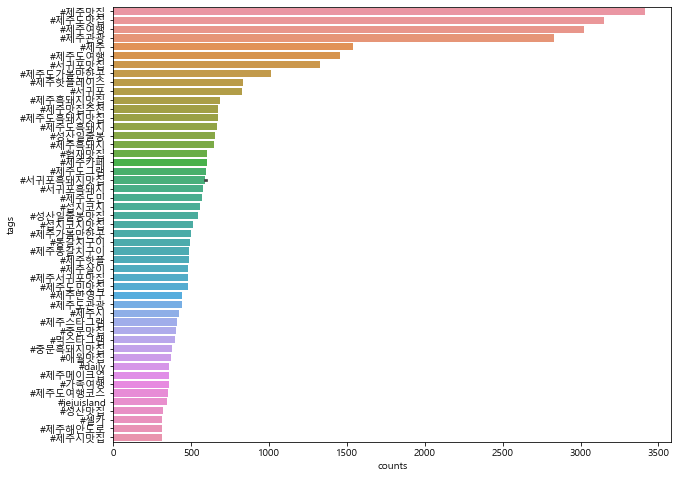

In [296]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags',
           data = tag_count_df)
plt.show()

In [299]:
!pip install wordcloud==1.4.1

  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\OWNER\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\OWNER\\AppData\\Local\\Temp\\pip-install-84d4riqx\\wordcloud_7d0d71c1df914f79b5a7550a3eb7c46a\\setup.py'"'"'; __file__='"'"'C:\\Users\\OWNER\\AppData\\Local\\Temp\\pip-install-84d4riqx\\wordcloud_7d0d71c1df914f79b5a7550a3eb7c46a\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\OWNER\AppData\Local\Temp\pip-wheel-8adlhb6o'
       cwd: C:\Users\OWNER\AppData\Local\Temp\pip-install-84d4riqx\wordcloud_7d0d71c1df914f79b5a7550a3eb7c46a\
  Complete output (16 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9

In [300]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [301]:
raw_total.head()

,content,date,like,place,tags
0,제주도 도착~~공항근처 #제주분식 에서 먹은 첫식사만족만족!#제주맛집#제주도맛집#제...,2019-01-01,705,NaN,"['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛..."
1,﻿#함덕맛집 무거버거 바다 보면서 먹으니까 더 꿀맛👍🏻 #제주도카페투어#제주일상#함...,2019-01-01,384,NaN,"['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo..."
2,.대만족 제주스!.#동문시장#제주동문시장#제주도기념품#제주기념품#제주스는완벽#제주도...,2019-01-01,595,NaN,"['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주..."
3,#제주여행#2일차무거버거 제주와서 먹은것중에 제일 맛있었음!#제주도여행#제주맛집#함...,2019-01-01,412,NaN,"['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛..."
4,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364,로타리과자점,[]


In [307]:
location_counts = raw_total['place'].value_counts()
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [313]:
locations = list(location_counts_df.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '석부작박물관',
 '제주도 애월읍',
 '카멜리아 힐',
 '알뜨르 비행장',
 '밥깡패',
 '고집돌우럭중문점',
 '제주 함덕 서우봉 해변',
 '제주레포츠랜드',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '위미동백나무군락지',
 '할로비치',
 '제주신화월드 Jeju Shinhwa World',
 '연동 바오젠 거리',
 '협재해변 Beach',
 'Woljeongri Beach',
 '새별오름',
 '고래배꼽',
 '용머리해안',
 '용눈이오름',
 '사려니숲길',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '하이엔드 제주',
 '제주빅볼랜드',
 '캔디원',
 'Jeju Island 제주특별자치도 济州道',
 '한라산',
 '마마뜰',
 '위미동백나무군락',
 '제주커피박물관 Baum',
 '휴애리 자연생활공원',
 '서귀포 느영나영 게스트하우스',
 '삼무공원',
 'Jeju Aewol',
 '위미2리 동백군락지',
 '한라산 (漢拏山, Hallasan)',
 '서우봉',
 '광치기해변',
 '제주해남',
 '제주 송악산',
 '제주어린왕자게스트하우스',
 '월정리카페콧수염',
 '옹포별장가든',
 '성이시돌목장',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 '산굼부리',
 '에코랜드',
 '곽지해수욕장',
 '牛岛 Udo Island 우도',
 '아줄레주',
 '카페브리프',
 '카페한라산',
 '르페도라펜션',
 'Hidden Cliff / 히든 클리프',
 '디저트쌀롱 톨',
 '